In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #12 by 8 inches of plotsize

- ### Reading and Inspection

In [3]:
df=pd.read_csv("IMDB_Movies.csv") 
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


-  ### Inspecting the dataframe

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df.shape

(5043, 28)

In [6]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

- ### Cleaning the Data

In [7]:
#column-wise null count
df.isnull().sum()


color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
#row-wise null count
df.isnull().sum(axis=1)


0        0
1        0
2        0
3        0
4       13
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [9]:
# column-wise null percentage
perc=np.mean(df.isnull())*100
perc.round(decimals=2)


color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.40
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [10]:
#dropping the unnecessary columns. 
df=df.drop(['color',
'director_facebook_likes',
'actor_1_facebook_likes',
'actor_2_facebook_likes',
'actor_3_facebook_likes',
'actor_2_name',
'cast_total_facebook_likes',
'actor_3_name',
'duration',
'facenumber_in_poster',
'content_rating',
'country',
'movie_imdb_link',
'aspect_ratio',
'plot_keywords'],axis=1)
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,,NaN,NaN,NaN,7.1,0


In [11]:
# dropping the rows for which columns have high percentage of null values
df=df.dropna(thresh=df.shape[1]*0.95,axis=0) #atleast 95% data in columns
df

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,9000.0,2011.0,6.4,413


In [12]:
#code for filling the NaN values in the 'language' column.
df['language']=df['language'].fillna('English')
df

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,9000.0,2011.0,6.4,413


In [13]:
#code for unit conversion here
def to_million(x):
    return x/1000000
df.gross=df.gross.apply(to_million)
df.budget=df.budget.apply(to_million)
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7,2012.0,6.6,24000


- ### Analysing the data

In [14]:
#code for creating the profit column
df['profit']=df['gross']-df['budget']
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7,2012.0,6.6,24000,-190.641321


In [15]:
#code for sorting the dataframe by profit
df=df.sort_values(by=['profit'],ascending=False)
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459


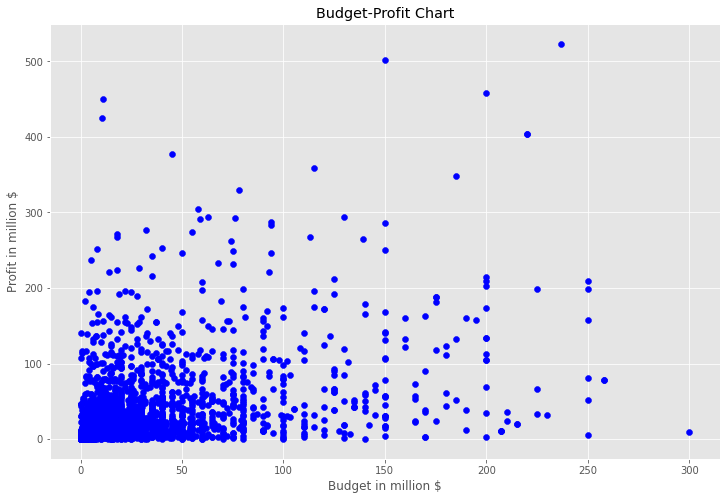

In [16]:
#code for profit vs budget plot
df1=df.copy()
df1=df1[df1.profit>0]
plt.scatter(df1['budget'], df1['profit'],edgecolors = 'b',facecolor='b') 
plt.xlabel("Budget in million $") 
plt.ylabel("Profit in million $") 
plt.title("Budget-Profit Chart")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='profit'>

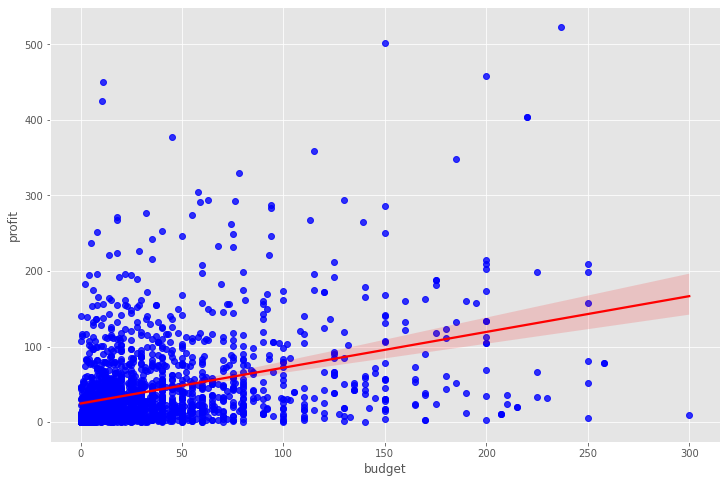

In [17]:
#correlation
sns.regplot(x='budget',y='profit',data=df1,scatter_kws={"color":"blue"},line_kws={"color":"red"})

In [18]:
#dropping duplicate values
df=df.drop_duplicates(subset=['movie_title','language'])
df

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.000000,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.000000,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.000000,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.000000,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.500000,1982.0,7.9,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105.0,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79,Japanese,2127.519898,2004.0,6.9,973,-2127.109510
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
3005,Lajos Koltai,73.0,0.195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45,Hungarian,2500.000000,2005.0,7.1,607,-2499.804112
3859,Chan-wook Park,202.0,0.211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131,Korean,4200.000000,2005.0,7.7,4000,-4199.788333


In [19]:
#top 10 profiting movies
top10=df.head(10)
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061
439,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959,English,78.0,2012.0,7.3,140000,329.999255


In [20]:
df.corr() #correlation

,num_critic_for_reviews,gross,num_voted_users,budget,title_year,imdb_score,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.466455,0.598532,0.103603,0.394165,0.345905,0.703144,0.038101
gross,0.466455,1.000000,0.629772,0.096418,0.037234,0.213462,0.363900,0.205271
num_voted_users,0.598532,0.629772,1.000000,0.066086,0.013738,0.474858,0.523335,0.123999
budget,0.103603,0.096418,0.066086,1.000000,0.042132,0.029597,0.050685,-0.954354
title_year,0.394165,0.037234,0.013738,0.042132,1.000000,-0.130916,0.291118,-0.030254
imdb_score,0.345905,0.213462,0.474858,0.029597,-0.130916,1.000000,0.283189,0.034952
movie_facebook_likes,0.703144,0.363900,0.523335,0.050685,0.291118,0.283189,1.000000,0.059360
profit,0.038101,0.205271,0.123999,-0.954354,-0.030254,0.034952,0.059360,1.000000


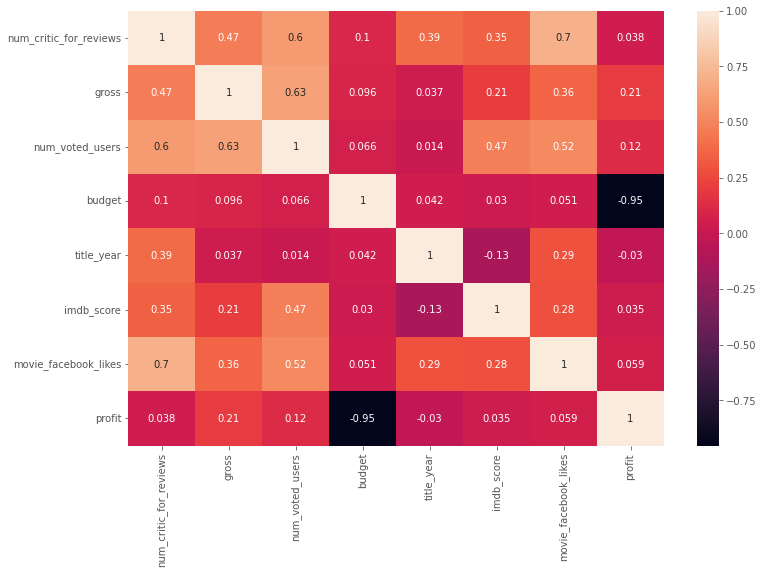

In [21]:
#heatmap
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [22]:
#converting non numeric data to codes
df_numerised=df.copy()

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype =='object'):
        df_numerised[col_name]= df_numerised[col_name].astype('category')
        df_numerised[col_name]= df_numerised[col_name].cat.codes

df_numerised            

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,653,723.0,760.505847,93,197,293,886204,392,10,237.000000,2009.0,7.9,33000,523.505847
29,281,644.0,652.177271,108,190,1499,418214,100,10,150.000000,2015.0,7.0,150000,502.177271
26,653,315.0,658.672302,712,862,3489,793059,322,10,200.000000,1997.0,7.7,26000,458.672302
3024,546,282.0,460.935665,93,528,2547,911097,145,10,11.000000,1977.0,8.7,33000,449.935665
3080,1572,215.0,434.949459,729,545,876,281842,619,10,10.500000,1982.0,7.9,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,909,105.0,0.410388,15,1477,2556,13727,836,20,2127.519898,2004.0,6.9,973,-2127.109510
2323,603,174.0,2.298191,290,1025,2142,221552,667,20,2400.000000,1997.0,8.4,11000,-2397.701809
3005,959,73.0,0.195888,717,917,983,5603,556,16,2500.000000,2005.0,7.1,607,-2499.804112
3859,215,202.0,0.211667,605,1023,1567,53508,105,22,4200.000000,2005.0,7.7,4000,-4199.788333


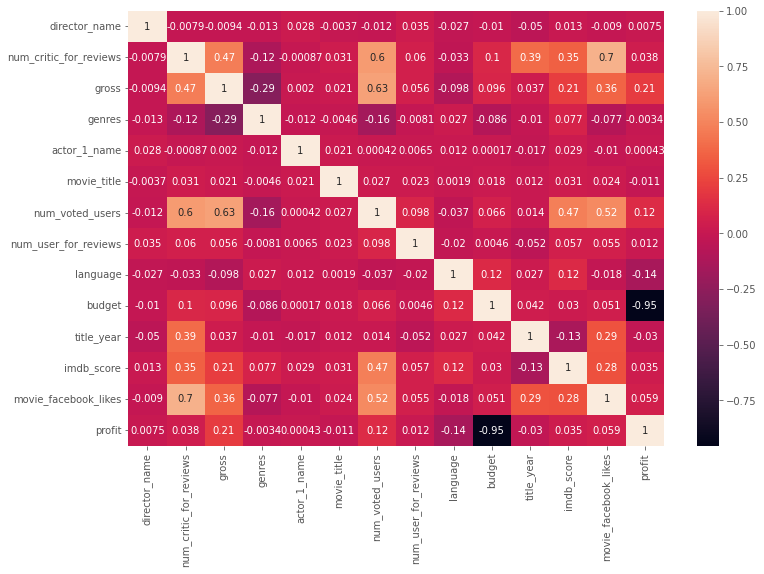

In [23]:
#heatmap for every column
correlation=df_numerised.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [24]:
#unstacking the correlating pairs
correlation=df_numerised.corr()
corr_pairs=correlation.unstack()
corr_pairs

director_name  director_name             1.000000
               num_critic_for_reviews   -0.007910
               gross                    -0.009373
               genres                   -0.012678
               actor_1_name              0.027549
                                           ...   
profit         budget                   -0.954354
               title_year               -0.030254
               imdb_score                0.034952
               movie_facebook_likes      0.059360
               profit                    1.000000
Length: 196, dtype: float64

In [25]:
#sorting the correlation values
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget                  profit                   -0.954354
profit                  budget                   -0.954354
gross                   genres                   -0.292540
genres                  gross                    -0.292540
                        num_voted_users          -0.159000
                                                    ...   
                        genres                    1.000000
gross                   gross                     1.000000
num_critic_for_reviews  num_critic_for_reviews    1.000000
movie_facebook_likes    movie_facebook_likes      1.000000
profit                  profit                    1.000000
Length: 196, dtype: float64

In [26]:
#high correlating pairs
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

movie_facebook_likes    num_voted_users           0.523335
num_voted_users         movie_facebook_likes      0.523335
                        num_critic_for_reviews    0.598532
num_critic_for_reviews  num_voted_users           0.598532
num_voted_users         gross                     0.629772
gross                   num_voted_users           0.629772
movie_facebook_likes    num_critic_for_reviews    0.703144
num_critic_for_reviews  movie_facebook_likes      0.703144
director_name           director_name             1.000000
imdb_score              imdb_score                1.000000
title_year              title_year                1.000000
budget                  budget                    1.000000
language                language                  1.000000
num_user_for_reviews    num_user_for_reviews      1.000000
num_voted_users         num_voted_users           1.000000
movie_title             movie_title               1.000000
actor_1_name            actor_1_name              1.0000

In [27]:
#extracting the top 250 movies as per the IMDb score. 
IMDb_Top_250=df[['imdb_score','num_voted_users','movie_title','language']]
IMDb_sort= IMDb_Top_250.sort_values(by=['imdb_score'],ascending=False)
IMDb_Top_250=IMDb_sort[IMDb_Top_250.num_voted_users>25000]
IMDb_Top_250["Rank"]=IMDb_Top_250['movie_title'].rank()
IMDb_Top_250['Rank']=IMDb_Top_250['Rank'].sort_values(ascending=True).values
IMDb_Top_250=IMDb_Top_250.set_index('Rank')
IMDb_Top_250.head(250)

,imdb_score,num_voted_users,movie_title,language
Rank,,,,
1.0,9.3,1689764,The Shawshank Redemption,English
2.0,9.2,1155770,The Godfather,English
3.0,9.0,790926,The Godfather: Part II,English
4.0,9.0,1676169,The Dark Knight,English
5.0,8.9,503509,"The Good, the Bad and the Ugly",Italian
...,...,...,...,...
246.0,7.9,696338,Iron Man,English
247.0,7.9,188637,Walk the Line,English
248.0,7.9,385871,Toy Story 2,English


In [28]:
#extracting top foreign language films from 'IMDb_Top_250'
Top_Foreign_Lang_Film =IMDb_Top_250[(IMDb_Top_250.language!='English')]
Top_Foreign_Lang_Film.head(40)

,imdb_score,num_voted_users,movie_title,language
Rank,,,,
5.0,8.9,503509,"The Good, the Bad and the Ugly",Italian
14.0,8.7,229012,Seven Samurai,Japanese
16.0,8.7,533200,City of God,Portuguese
25.0,8.6,417971,Spirited Away,Japanese
30.0,8.5,259379,The Lives of Others,German
42.0,8.5,27882,Children of Heaven,Persian
47.0,8.4,534262,Amélie,French
50.0,8.4,221552,Princess Mononoke,Japanese
53.0,8.4,356181,Oldboy,Korean


In [29]:
#extracting the top 10 directors here by imdb score
director=df.groupby('director_name')

top10director=pd.DataFrame(director['imdb_score'].mean().sort_values(ascending=False))
top10director=top10director.sort_values(['imdb_score','director_name'],ascending=(False,True))
top10director.head(10)


,imdb_score
director_name,
Charles Chaplin,8.600000
Tony Kaye,8.600000
Alfred Hitchcock,8.500000
Damien Chazelle,8.500000
Majid Majidi,8.500000
Ron Fricke,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000
Asghar Farhadi,8.400000


In [30]:
#extracting the first two genres of each movie here
df['genres']=df.genres.str.split('|')
df['genre_1']=df['genres'].apply(lambda x: x[0])
df['genre_2']=df['genres'].apply(lambda x: x[1] if len(x)>1 else x[0]) #if only one genre then same displayed in both columns 
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847,Action,Adventure
29,Colin Trevorrow,644.0,652.177271,"[Action, Adventure, Sci-Fi, Thriller]",Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271,Action,Adventure
26,James Cameron,315.0,658.672302,"[Drama, Romance]",Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302,Drama,Romance
3024,George Lucas,282.0,460.935665,"[Action, Adventure, Fantasy, Sci-Fi]",Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665,Action,Adventure
3080,Steven Spielberg,215.0,434.949459,"[Family, Sci-Fi]",Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459,Family,Sci-Fi


In [31]:
#grouping the dataframe here
movies_by_segment =df.groupby(['genre_1','genre_2'])
movies_by_segment

In [32]:
#getting the 5 most popular combo of genres
PopGenre=pd.DataFrame(movies_by_segment.gross.mean().sort_values(ascending=False) )
PopGenre[0:5]

gross
genre_1   genre_2              
Family    Sci-Fi     434.949459
Adventure Sci-Fi     228.627758
          Animation  115.949069
          Family     110.942298
Action    Adventure  107.880651

In [33]:
df['num_user_for_reviews'] = df['num_user_for_reviews'].apply(pd.to_numeric)

In [34]:
#creating three new dataframes for three different actors
Meryl_Streep =df[['actor_1_name','movie_title','num_critic_for_reviews','num_user_for_reviews']]
Leo_Caprio=df[['actor_1_name','movie_title','num_critic_for_reviews','num_user_for_reviews']]
Brad_Pitt=df[['actor_1_name','movie_title','num_critic_for_reviews','num_user_for_reviews']]

Meryl_Streep=Meryl_Streep.loc[Meryl_Streep['actor_1_name']=='Meryl Streep',:]
Meryl_Streep.head()# Include all movies in which Meryl_Streep is the lead

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
1408,Meryl Streep,The Devil Wears Prada,208.0,631
1575,Meryl Streep,Out of Africa,66.0,200
1204,Meryl Streep,Julie & Julia,252.0,277
1618,Meryl Streep,Hope Springs,234.0,178
410,Meryl Streep,It's Complicated,187.0,214


In [35]:
Leo_Caprio=Leo_Caprio.loc[Leo_Caprio['actor_1_name']=='Leonardo DiCaprio',:]
Leo_Caprio.head()# Include all movies in which Leo_Caprio is the lead

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
26,Leonardo DiCaprio,Titanic,315.0,2528
97,Leonardo DiCaprio,Inception,642.0,2803
911,Leonardo DiCaprio,Catch Me If You Can,194.0,667
296,Leonardo DiCaprio,Django Unchained,765.0,1193
179,Leonardo DiCaprio,The Revenant,556.0,1188


In [36]:
Brad_Pitt=Brad_Pitt.loc[Brad_Pitt['actor_1_name']=='Brad Pitt',:]
Brad_Pitt.head() # Include all movies in which Brad_Pitt is the lead

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
400,Brad Pitt,Ocean's Eleven,186.0,845
255,Brad Pitt,Mr. & Mrs. Smith,233.0,798
940,Brad Pitt,Interview with the Vampire: The Vampire Chroni...,120.0,406
470,Brad Pitt,Fury,406.0,701
254,Brad Pitt,Ocean's Twelve,198.0,627


In [37]:
#combining the three dataframes here
Combined=Meryl_Streep.append(Leo_Caprio).append(Brad_Pitt)
Combined

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
1408,Meryl Streep,The Devil Wears Prada,208.0,631
1575,Meryl Streep,Out of Africa,66.0,200
1204,Meryl Streep,Julie & Julia,252.0,277
1618,Meryl Streep,Hope Springs,234.0,178
410,Meryl Streep,It's Complicated,187.0,214
2781,Meryl Streep,The Iron Lady,331.0,350
1925,Meryl Streep,The Hours,174.0,660
3135,Meryl Streep,A Prairie Home Companion,211.0,280
1106,Meryl Streep,The River Wild,42.0,69
1674,Meryl Streep,One True Thing,64.0,112


In [38]:
#grouping the combined dataframe by actor
Actor_name=Combined.groupby('actor_1_name')
Actor_name

In [39]:
#displaying the critic reviews for the actors
Critic_reviews=Actor_name['num_critic_for_reviews'].mean().sort_values(ascending=False)
Critic_reviews

actor_1_name
Leonardo DiCaprio    322.200000
Brad Pitt            245.000000
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64

In [40]:
#displaying the user reviews for the actors
user_reviews=Actor_name['num_user_for_reviews'].mean().sort_values(ascending=False)
user_reviews

actor_1_name
Leonardo DiCaprio    922.550000
Brad Pitt            742.352941
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

In [41]:
#calculating and displaying the decade
df['decade']=df['title_year'].apply(lambda x: (x//10) *10).astype(np.int64)
df['decade']=df['decade'].astype(str)+'s'
df=df.sort_values(['decade'])
df

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2,decade
4812,Harry Beaumont,36.0,2.808000,"[Musical, Romance]",Anita Page,The Broadway Melody,4546,71,English,0.379,1929.0,6.3,167,2.429000,Musical,Romance,1920s
2734,Fritz Lang,260.0,0.026435,"[Drama, Sci-Fi]",Brigitte Helm,Metropolis,111841,413,German,6.000,1927.0,8.3,12000,-5.973565,Drama,Sci-Fi,1920s
4157,Victor Fleming,213.0,22.202612,"[Adventure, Family, Fantasy, Musical]",Margaret Hamilton,The Wizard of Oz,291875,533,English,2.800,1939.0,8.1,14000,19.402612,Adventure,Family,1930s
3970,Victor Fleming,157.0,198.655278,"[Drama, History, Romance, War]",Hattie McDaniel,Gone with the Wind,215340,706,English,3.977,1939.0,8.2,16000,194.678278,Drama,History,1930s
4786,Lloyd Bacon,65.0,2.300000,"[Comedy, Musical, Romance]",Ginger Rogers,42nd Street,7921,97,English,0.439,1933.0,7.7,439,1.861000,Comedy,Musical,1930s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Antoine Fuqua,358.0,98.895417,"[Action, Thriller]",Gerard Butler,Olympus Has Fallen,203154,698,English,70.000,2013.0,6.5,45000,28.895417,Action,Thriller,2010s
2004,Giuseppe Tornatore,124.0,0.085433,"[Crime, Drama, Mystery, Romance]",Jim Sturgess,The Best Offer,69676,131,English,13.500,2013.0,7.8,31000,-13.414567,Crime,Drama,2010s
1002,Andrew Niccol,298.0,26.616999,"[Action, Adventure, Romance, Sci-Fi, Thriller]",J.D. Evermore,The Host,92461,347,English,40.000,2013.0,5.9,43000,-13.383001,Action,Adventure,2010s
2592,Tommy Lee Jones,208.0,2.428883,"[Drama, Western]",Barry Corbin,The Homesman,21370,132,English,16.000,2014.0,6.6,0,-13.571117,Drama,Western,2010s


In [42]:
#creating the data frame df_by_decade
df_by_decade=df.groupby('decade')
df_by_decade['num_voted_users'].sum()
#Convert to Dafaframe
df_by_decade=pd.DataFrame(df_by_decade['num_voted_users'].sum())
df_by_decade

,num_voted_users
decade,
1920s,116387
1930s,804839
1940s,230838
1950s,678336
1960s,2983442
1970s,8269835
1980s,19344380
1990s,69635866
2000s,166041222


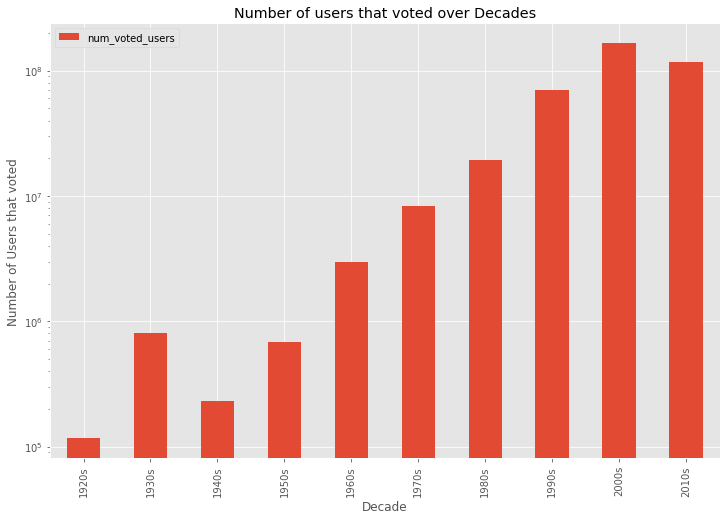

In [43]:
#plotting number of users that voted vs decade
df_by_decade.plot.bar()
plt.xlabel("Decade")
plt.ylabel("Number of Users that voted")
plt.title("Number of users that voted over Decades")
plt.yscale('log') 
plt.show()